## Dataset credits: https://github.com/myleott/mnist_png

In [1]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pylab as pl
import os
import cv2
import random
warnings.filterwarnings('ignore')
%matplotlib inline
pl.gray()

In [2]:
train='mnist_png/training/'
temp=np.array([[(a,cv2.imread(str(train+a+"/"+x),0)) for x in os.listdir(train+a)] for a in os.listdir(train)])
data = [x for sublist in temp for x in sublist]
random.shuffle(data)
y_train,x_train=zip(*data)
x_train=np.array(x_train)
y_train=np.array(y_train)

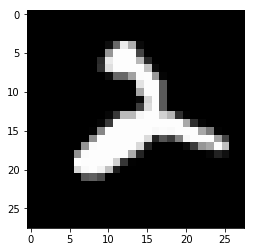

In [3]:
pl.imshow(x_train[421])

In [4]:
test='mnist_png/testing/'
temp=np.array([[(a,cv2.imread(str(test+a+"/"+x),0)) for x in os.listdir(test+a)] for a in os.listdir(test)])
data = [x for sublist in temp for x in sublist]
random.shuffle(data)
y_test,x_test=zip(*data)
x_test=np.array(x_test)
y_test=np.array(y_test)

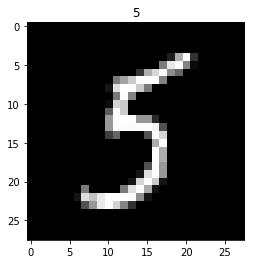

In [5]:
pl.imshow(x_test[420])
pl.title(y_test[420])

In [15]:
X_test=np.array([np.reshape(image,784) for image in x_test])
X_train=np.array([np.reshape(image,784) for image in x_train])

In [18]:
from sklearn.svm import LinearSVC

In [19]:
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.84989999999999999

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.97019999999999995

In [21]:
from xgboost import XGBClassifier

In [23]:
clf=XGBClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
clf=Sequential()
clf.add(Convolution2D(16,3,3,input_shape=(28,28,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Convolution2D(16,3,3,activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Convolution2D(16,3,3,activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Flatten())
clf.add(Dense(output_dim=128,activation='sigmoid'))
clf.add(Dropout(0.5))
clf.add(Dense(output_dim=10,activation='sigmoid'))
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('mnist_png/training/',target_size=(28,28),batch_size=32,class_mode="categorical")
test_set=test_datagen.flow_from_directory('mnist_png/testing/',target_size=(28,28),batch_size=32,class_mode="categorical")

In [ ]:
clf.fit_generator(training_set,samples_per_epoch=8000,nb_epoch=25,validation_data=test_set,nb_val_samples=2000)